# Exercício

1. Carregue o arquivo sentimento_ingle.csv em um dataframe df. 

2. Crie uma função que leia um texto, remova stop_words e pontuações, além de colocar todas as letras em caixa baixa. O resultado deve ser uma lista de contendo textos lematizados.

3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através do métodos: $\textit{BOW}$ e $\textit{TF-IDF}$. Os resultados devem ser dataframes nomeados como d_bow e d_ftidf ,respectivamente. 

5. Para cada método anterior, desenvolva um Analisador de Sentimentos de uma sentença em linguagem natural, usando algum modelo de Machine Learning. Compare os indices de performance (acurário e F1) entre os 2 métodos. Faça um barplot para comparação entre os indices de performance. 


OBS: Note que o dataset está em INGLÊS.




In [1]:
%pip install seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import string 
from tqdm import tqdm

import spacy
#stop_words em ingles
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm

In [3]:
!python3.10 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
pln=spacy.load("en_core_web_sm")
stop_words=STOP_WORDS
pontuacoes=string.punctuation
pontuacoes=pontuacoes+"..."+' '

In [5]:
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [6]:
def processamento(texto):
    
    texto=texto.lower()
    documento=pln(texto)
    lista1=[]
    for p in documento :
        #lista.append(p)
        lista1.append(p.lemma_)#lematização
    lista2=[]
    for p in lista1:
        if (p in stop_words)==False:
            lista2.append(p)
    lista3=[]
    for p in lista2:
        if (p in pontuacoes)==False:
            lista3.append(p)
            
        
    return lista3

In [7]:
df=pd.read_csv('sentimento_ingles.csv')

In [8]:
df

,id,text,label
0,219,Enjoy 0% instalment for up to 12 months when o...,neutral
1,209,The cakes give me massive nostalgia. Everythin...,positive
2,436,Mom once worked for grab indonesia.,neutral
3,394,"I love having lunch here the most, thanks to t...",positive
4,592,The DAMRI Bus service is really good,positive
...,...,...,...
495,589,A talks like empty vessels that make the most ...,negative
496,636,You won't find this sambal anywhere else. The ...,positive
497,710,"I think the steak was quite good, my advice is...",positive
498,250,"Watch what you eat, Gus, it's that kind of sea...",negative


3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

In [ ]:
df['text_lematizado']=df['text'].apply(processamento)

df.head(3)

,id,text,label,text_lematizado
0,219,Enjoy 0% instalment for up to 12 months when o...,neutral,"[enjoy, 0, instalment, 12, month, order, air, ..."
1,209,The cakes give me massive nostalgia. Everythin...,positive,"[cake, I, massive, nostalgia, old, school, pre..."
2,436,Mom once worked for grab indonesia.,neutral,"[mom, work, grab, indonesia]"


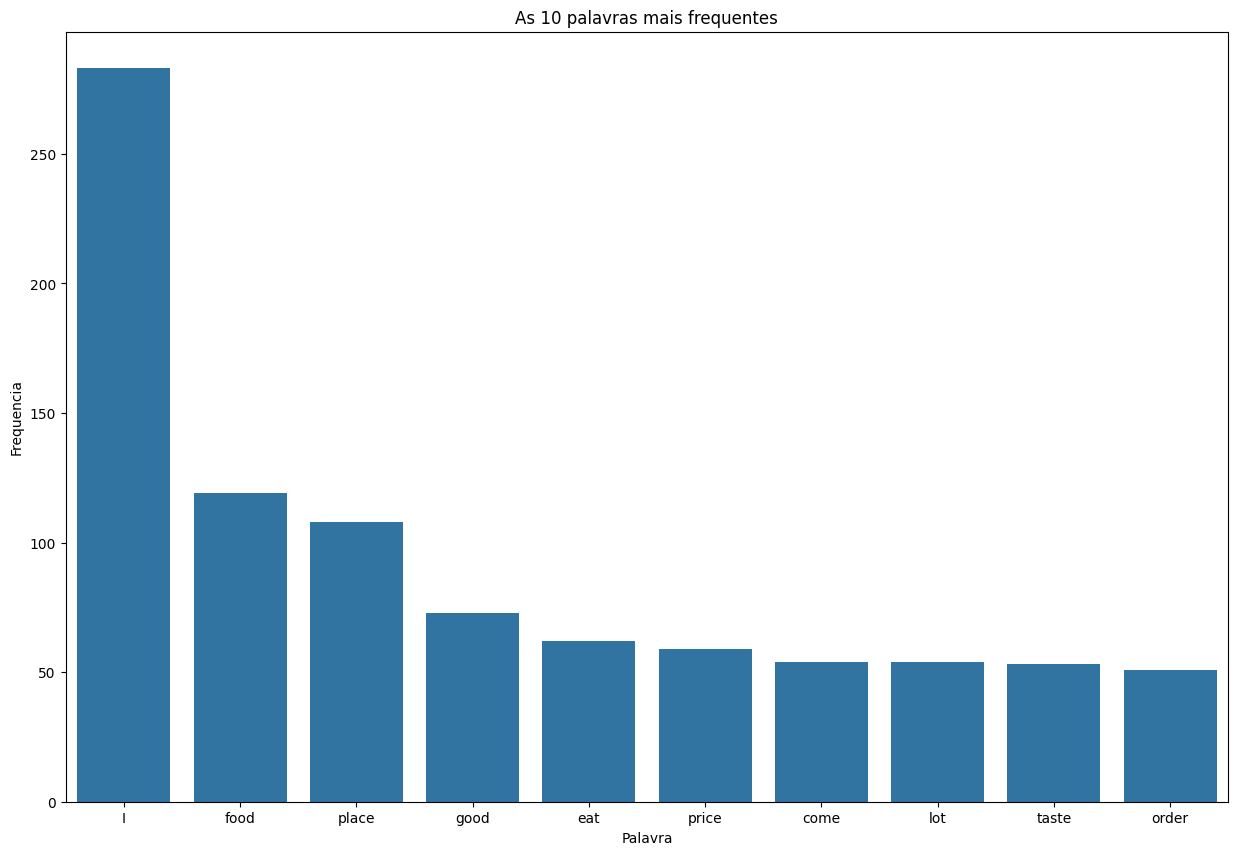

In [ ]:

from collections import Counter

lista_palavras=[]
for i in df['text_lematizado']:
    for j in i:
        lista_palavras.append(j)
        
frequencia=Counter(lista_palavras)

df_frequencia=pd.DataFrame(frequencia.items(),columns=['Palavra','Frequencia'])

df_frequencia=df_frequencia.sort_values(by='Frequencia',ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Palavra',y='Frequencia',data=df_frequencia.head(10))
plt.title('As 10 palavras mais frequentes')
plt.show()

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através do métodos: $\textit{BOW}$ e $\textit{TF-IDF}$. Os resultados devem ser dataframes nomeados como d_bow e d_ftidf ,respectivamente. 

In [16]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 20.8 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 16.4 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

#BOW
vetorizar=CountVectorizer()
vetorizar.fit(df['text'])
vetor_bow=vetorizar.transform(df['text'])
d_bow=pd.DataFrame(vetor_bow.toarray(),columns=vetorizar.get_feature_names_out())
d_bow.head(3)

,00,000,10,100,1000,12,120,13,14000,15,...,young,younger,your,yourself,youtube,yum,yummy,zan,zebra,zero
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF
vetorizar=TfidfVectorizer()
vetorizar.fit(df['text'])
vetor_ftidf=vetorizar.transform(df['text'])
d_ftidf=pd.DataFrame(vetor_ftidf.toarray(),columns=vetorizar.get_feature_names_out())

d_ftidf.head(3)

,00,000,10,100,1000,12,120,13,14000,15,...,young,younger,your,yourself,youtube,yum,yummy,zan,zebra,zero
0,0.0,0.0,0.0,0.0,0.0,0.309056,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5. Para cada método anterior, desenvolva um Analisador de Sentimentos de uma sentença em linguagem natural, usando algum modelo de Machine Learning. Compare os indices de performance (acurário e F1) entre os 2 métodos. Faça um barplot para comparação entre os indices de performance. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

X=d_bow
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

modelo=LogisticRegression()
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)

acuracia_bow=accuracy_score(y_test,y_pred)
f1_bow=f1_score(y_test,y_pred,average='weighted')

In [21]:
X=d_ftidf
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

modelo=LogisticRegression()
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)

acuracia_ftidf=accuracy_score(y_test,y_pred)
f1_ftidf=f1_score(y_test,y_pred,average='weighted')

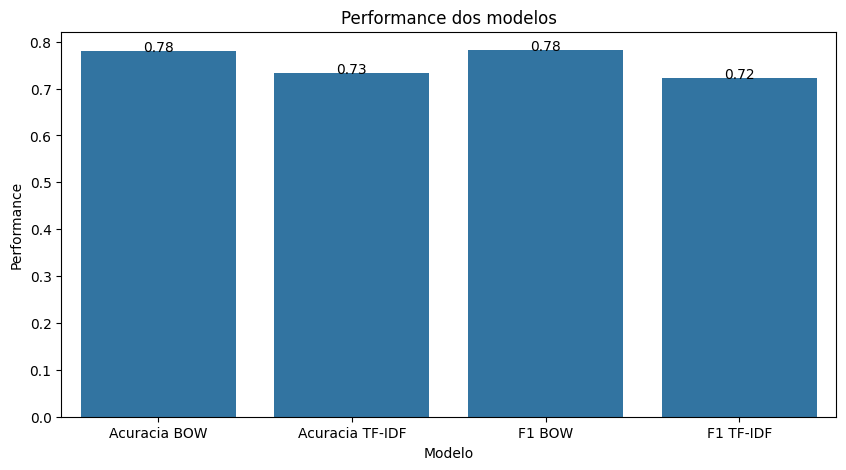

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=['Acuracia BOW','Acuracia TF-IDF','F1 BOW','F1 TF-IDF'],y=[acuracia_bow,acuracia_ftidf,f1_bow,f1_ftidf])
plt.title('Performance dos modelos')
plt.ylabel('Performance')
plt.xlabel('Modelo')
for i in range(4):
    plt.text(i, [acuracia_bow,acuracia_ftidf,f1_bow,f1_ftidf][i], round([acuracia_bow,acuracia_ftidf,f1_bow,f1_ftidf][i],2), ha = 'center')
plt.show()

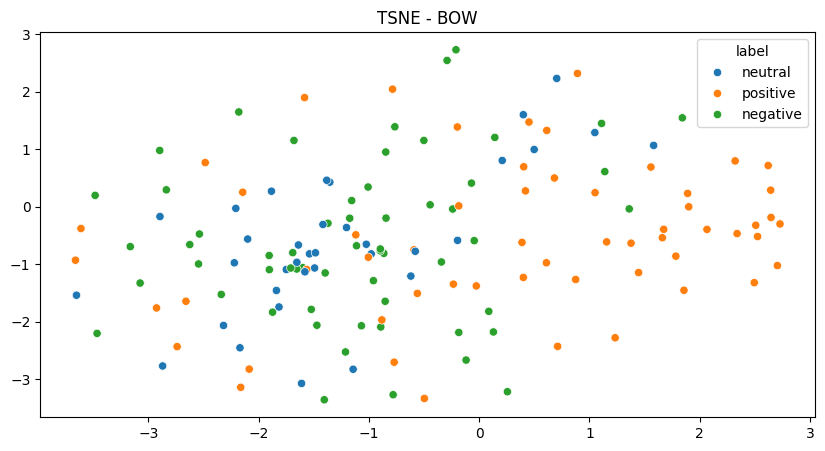

In [29]:
# faça a nuvem de pontos do TNSE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X=d_bow
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

modelo=TSNE(n_components=2)
X_tsne=modelo.fit_transform(X_test)

plt.figure(figsize=(10,5))
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],hue=y_test)
plt.title('TSNE - BOW')
plt.show()

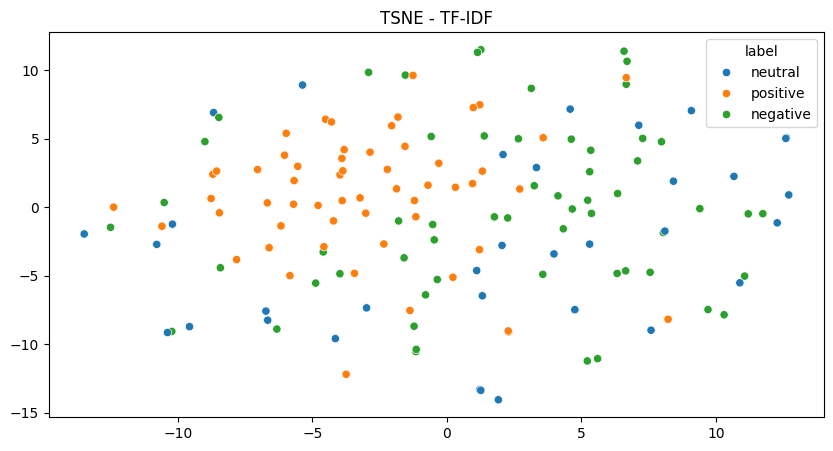

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X=d_ftidf
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

modelo=TSNE(n_components=2)
X_tsne=modelo.fit_transform(X_test)

plt.figure(figsize=(10,5))
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],hue=y_test)
plt.title('TSNE - TF-IDF')
plt.show()